# Assignment - Performance Metrics
In this assignment, you will measure the performance of the model you created with the Titanic data in the previous lesson. To complete this assignment, send a link to a Jupyter notebook containing solutions to the following tasks.

* Evaluate the performance of your model with the metrics you have learned in this course.
* Plot the ROC and the precision / recall curves for different "c" values.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
titanic = pd.read_csv("titanic2.csv")
df = titanic.copy()

In [2]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,1,0,1
1,1,1,38,1,0,71.2833,0,0,0
2,1,3,26,0,0,7.9250,0,0,1
3,1,1,35,1,0,53.1000,0,0,1
4,0,3,35,0,0,8.0500,1,0,1


In [3]:
y = df['Survived']
X = df.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=111)

model = LogisticRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [4]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, train_pred)
cm_test = confusion_matrix(y_test, test_pred)

In [5]:
print("Confusion Matrix (Train Data)", "-"*30, cm_train, sep="\n")
print("\n\nConfusion Matrix (Test Data)", "-"*30, cm_test, sep="\n")

Confusion Matrix (Train Data)
------------------------------
[[391  54]
 [ 84 182]]


Confusion Matrix (Test Data)
------------------------------
[[92 12]
 [20 54]]


In [6]:
TN = cm_test[0][0]
TP = cm_test[1][1]
FN = cm_test[1][0]
FP = cm_test[0][1]

print("True negative amount  :", TN)
print("True positive amount  :", TP)
print("False positive amount :", FP)
print("False negative amount :", FN)

True negative amount  : 92
True positive amount  : 54
False positive amount : 12
False negative amount : 20


In [7]:
from sklearn.metrics import classification_report

print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       104
           1       0.82      0.73      0.77        74

    accuracy                           0.82       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



### ROC Curve and AUC Score

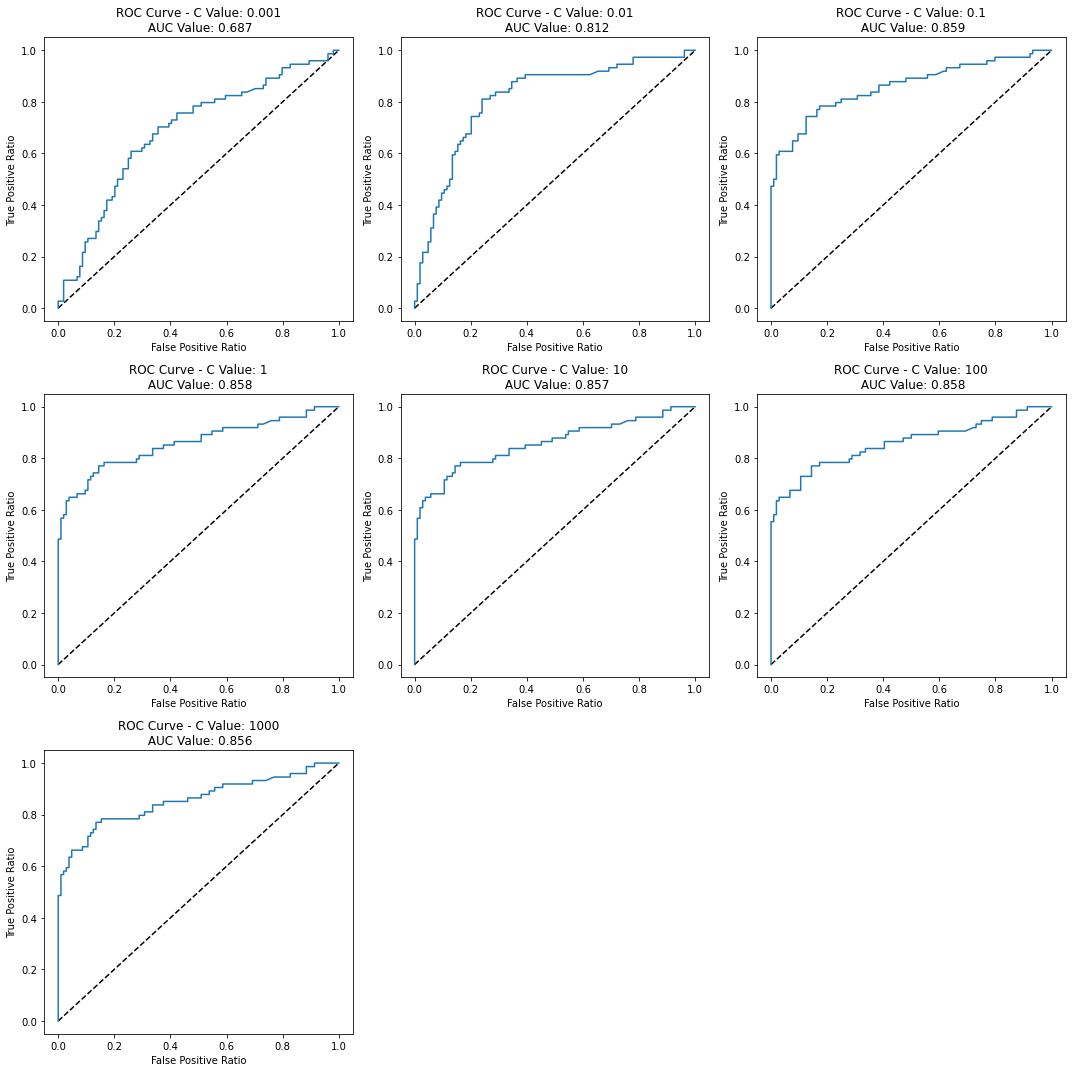

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

C_values = [0.001,0.01, 0.1,1,10,100, 1000]

plt.figure(figsize=(15, 15))
for i, c in enumerate(C_values, start=1):
    model = LogisticRegression(C = c, random_state = 0)
    model.fit(X_train, y_train)
    test_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, test_pred_proba)
    plt.subplot(3, 3, i)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    plt.title('ROC Curve - C Value: {}\n AUC Value: {:.3f}'.format(c, roc_auc_score(y_test, test_pred_proba)))
    plt.tight_layout()

The best c value for the highest AUC value is 0.1.

### Precision / Recall Curve

In [9]:
y = df['Survived']
X = df.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=111)

model = LogisticRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
test_pred_proba = model.predict_proba(X_test)[:,1]

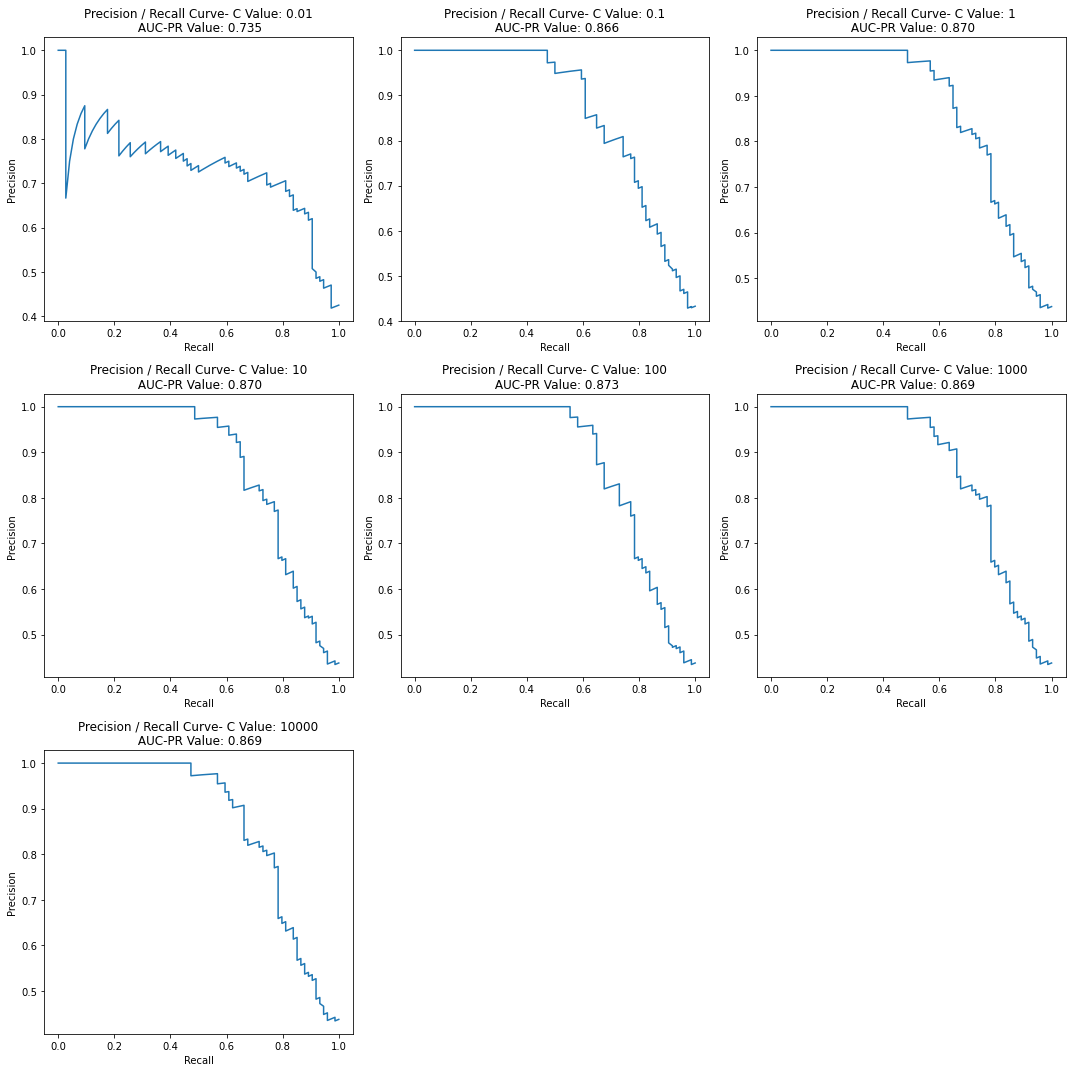

In [11]:
from sklearn.metrics import precision_recall_curve, average_precision_score

C_values = [0.01, 0.1, 1, 10, 100, 1000, 10000]

plt.figure(figsize=(15, 15))
for i, c in enumerate(C_values, start=1):
    model = LogisticRegression(C = c, random_state = 0)
    model.fit(X_train, y_train)
    test_pred_proba = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, test_pred_proba)
    plt.subplot(3, 3, i)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')  
    plt.title('Precision / Recall Curve- C Value: {}\n AUC-PR Value: {:.3f}'.format(c, average_precision_score(y_test, test_pred_proba)))
    plt.tight_layout()

The best c value for the highest AUC-PR value is 100.